In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits #math toolkit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

#sklearn is the stat library
#matplotlib, seaborn is the plotting library

In [2]:
df =pd.read_csv('grocery_data.csv',index_col = False)

In [3]:
df

,Item_ID,Item_Name,Category,Date,Last_Month_Sales,Capacity,Last_Year_Sales,Temperature,Weather,Predicted_Sales,City_Tier,On_promotion,Outlet
0,1,Lassi,Dairy,9-28-2023,82,109,1077,47,Sunny,81,2,0,1
1,1,Lassi,Dairy,9-28-2023,82,99,1068,46,Sunny,70,2,1,3
2,1,Lassi,Dairy,8-22-2023,71,99,1068,44,Rainy,69,1,1,2
3,1,Lassi,Dairy,8-22-2022,71,99,1068,41,Winter,70,1,1,2
4,1,Lassi,Dairy,8-18-2023,71,99,1068,33,Winter,70,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,39,Olive Oil,Oils,18-01-2019,66,99,1062,52,Rainy,68,1,1,1
12995,39,Olive Oil,Oils,16-01-2019,74,99,1066,42,Sunny,82,1,0,1
12996,39,Olive Oil,Oils,15-01-2019,70,109,1079,39,Winter,72,1,1,1
12997,39,Olive Oil,Oils,15-01-2019,88,99,1077,38,Autumn,75,2,0,1


In [4]:
df.describe()

,Item_ID,Last_Month_Sales,Capacity,Last_Year_Sales,Temperature,Predicted_Sales,City_Tier,On_promotion,Outlet
count,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,20.103546,74.034387,102.336487,1070.433187,40.517424,71.763136,1.999077,0.501192,1.996077
std,14.559883,9.001734,8.165074,8.215261,5.384592,8.510150,0.816904,0.500018,0.813167
min,1.000000,12.000000,40.000000,1009.000000,21.000000,9.000000,1.000000,0.000000,1.000000
25%,5.000000,70.000000,99.000000,1066.000000,37.000000,68.000000,1.000000,0.000000,1.000000
50%,19.000000,73.000000,99.000000,1070.000000,40.000000,71.000000,2.000000,1.000000,2.000000
75%,35.000000,81.000000,109.000000,1077.000000,44.000000,78.000000,3.000000,1.000000,3.000000
max,39.000000,107.000000,116.000000,1099.000000,60.000000,105.000000,3.000000,1.000000,3.000000


In [5]:
df.dtypes

Item_ID              int64
Item_Name           object
Category            object
Date                object
Last_Month_Sales     int64
Capacity             int64
Last_Year_Sales      int64
Temperature          int64
Weather             object
Predicted_Sales      int64
City_Tier            int64
On_promotion         int64
Outlet               int64
dtype: object

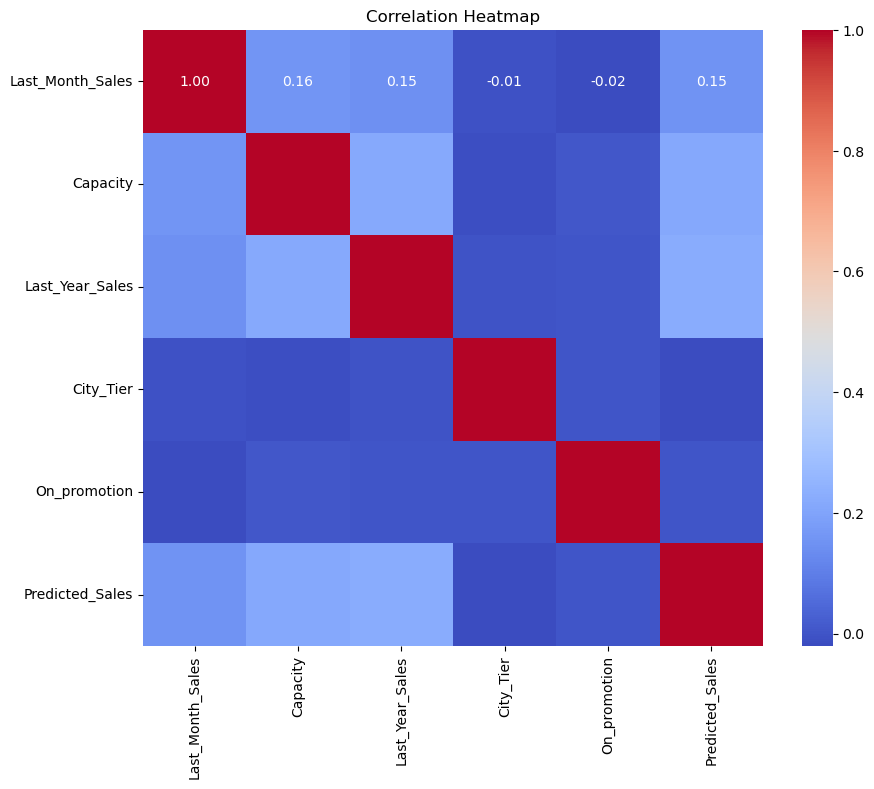

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting numerical columns for correlation matrix
numerical_cols = ['Last_Month_Sales', 'Capacity', 'Last_Year_Sales','City_Tier','On_promotion','Predicted_Sales'] #'City_Tier','On_promotion'
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
df_original = df.copy()

In [8]:
df_original

,Item_ID,Item_Name,Category,Date,Last_Month_Sales,Capacity,Last_Year_Sales,Temperature,Weather,Predicted_Sales,City_Tier,On_promotion,Outlet
0,1,Lassi,Dairy,9-28-2023,82,109,1077,47,Sunny,81,2,0,1
1,1,Lassi,Dairy,9-28-2023,82,99,1068,46,Sunny,70,2,1,3
2,1,Lassi,Dairy,8-22-2023,71,99,1068,44,Rainy,69,1,1,2
3,1,Lassi,Dairy,8-22-2022,71,99,1068,41,Winter,70,1,1,2
4,1,Lassi,Dairy,8-18-2023,71,99,1068,33,Winter,70,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,39,Olive Oil,Oils,18-01-2019,66,99,1062,52,Rainy,68,1,1,1
12995,39,Olive Oil,Oils,16-01-2019,74,99,1066,42,Sunny,82,1,0,1
12996,39,Olive Oil,Oils,15-01-2019,70,109,1079,39,Winter,72,1,1,1
12997,39,Olive Oil,Oils,15-01-2019,88,99,1077,38,Autumn,75,2,0,1


In [9]:
# Keeping the Item_ID for later use
item_ids = df['Item_ID'].values

In [10]:
item_ids

array([ 1,  1,  1, ..., 39, 39, 39], dtype=int64)

In [11]:
# One-hot encoding
categorical_cols = ['Item_Name', 'Category', 'Weather']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [12]:
# The target variable is the actual sales values
y = df['Predicted_Sales'].values
df.drop(columns=['Item_ID', 'Date', 'Predicted_Sales'], inplace=True)

In [13]:
X = df.values

In [14]:
X.shape

(12999, 52)

In [15]:
X #main train data, one hot encoded.

array([[82, 109, 1077, ..., False, True, False],
       [82, 99, 1068, ..., False, True, False],
       [71, 99, 1068, ..., True, False, False],
       ...,
       [70, 109, 1079, ..., False, False, True],
       [88, 99, 1077, ..., False, False, False],
       [64, 109, 1069, ..., True, False, False]], dtype=object)

In [16]:
y #target column/variable that you need to keep separate so model understands 

array([81, 70, 69, ..., 72, 75, 68], dtype=int64)

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the features
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

In [18]:
X

array([[0.73684211, 0.90789474, 0.75555556, ..., 0.        , 1.        ,
        0.        ],
       [0.73684211, 0.77631579, 0.65555556, ..., 0.        , 1.        ,
        0.        ],
       [0.62105263, 0.77631579, 0.65555556, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61052632, 0.90789474, 0.77777778, ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.77631579, 0.75555556, ..., 0.        , 0.        ,
        0.        ],
       [0.54736842, 0.90789474, 0.66666667, ..., 1.        , 0.        ,
        0.        ]])

In [19]:
# Scaling the target
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [20]:
y

array([[0.75      ],
       [0.63541667],
       [0.625     ],
       ...,
       [0.65625   ],
       [0.6875    ],
       [0.61458333]])

In [21]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [23]:
reg.fit(X_val,y_val)

LinearRegression()

In [24]:
reg.score(X_val,y_val)

0.14194909082163232

In [25]:
y_pred = reg.predict(X_val)

1. (R-squared)
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It is a statistical measure of how close the data are to the fitted regression line. and is often expressed as a percentage and is interpreted as the percentage of the response variable variation that is explained by a linear model. score of 1 indicates that the regression predictions perfectly fit the data.

2. RMSE (Root Mean Squared Error)
Root Mean Squared Error (RMSE) is the square root of the mean of the squared differences between the predicted and actual values. It measures the standard deviation of the residuals (prediction errors). RMSE is a good measure of how accurately the model predicts the response, and it is the most easily interpretable when compared to the original units of the dependent variable.

3. MAE (Mean Absolute Error)
Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and actual values. It measures how far predicted values from a model are from the actual values. Unlike RMSE, MAE gives a linear score, which means all the individual differences are weighted equally. It is less sensitive to outliers than RMSE.

In [26]:
# Calculate evaluation metrics for Gradient Boosting Regressor
mae_reg = mean_absolute_error(y_val, y_pred)
mse_reg = mean_squared_error(y_val, y_pred)
r2_reg = r2_score(y_val, y_pred)

In [27]:
print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_reg)
print("Mean Squared Error (MSE):", mse_reg)
print("R^2 Score:", r2_reg)

Linear Regression Metrics:
Mean Absolute Error (MAE): 0.06330887623322315
Mean Squared Error (MSE): 0.006790664722112158
R^2 Score: 0.14194909082163232


Residuals in a statistical or machine learning model are the differences between observed and predicted values of data. They are a diagnostic measure used when assessing the quality of a model. They are also known as errors.

Residual plot analysis is used to assess the validity of linear regression models by plotting the residuals and checking whether the assumptions of linear regression models are met. The most important assumption of a linear regression model is that the error terms or residuals are independent and normally distributed.